<a href="https://colab.research.google.com/github/WiraFebriArjuna/DataScience/blob/main/HOMEWORK_WEEK_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Import Libraries
import pandas as pd, numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
#Load Dataset
train_path = 'gdrive/MyDrive/Colab Notebooks/Dataset/application_train.csv'
train = pd.read_csv(train_path)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#Check null value
train['AMT_ANNUITY'].isna().sum()

12

In [94]:
#Check null value
train['AMT_INCOME_TOTAL'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


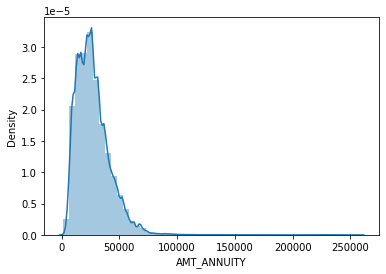

In [73]:
#Check 'AMT_ANNUITY' distribution shape
sns.distplot(train['AMT_ANNUITY'].dropna(),kde=True)
plt.show()

In [79]:
#Imputation
#Because 'AMT_ANNUITY' has skewed distribution, median is more suitable to replace the null value
train['AMT_ANNUITY'].fillna(train['AMT_ANNUITY'].median(), inplace=True)
train['AMT_ANNUITY'].isna().sum()

0

In [83]:
#Defining DTI and null value check
train['DTI'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['DTI'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


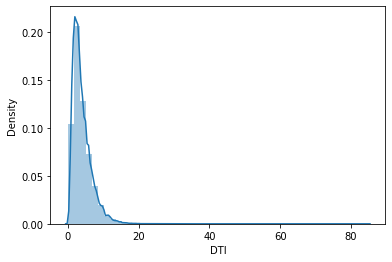

In [81]:
sns.distplot(train['DTI'].dropna(),kde=True)
plt.show()

In [84]:
train['DTI'].describe()

count    307511.000000
mean          0.180929
std           0.094573
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: DTI, dtype: float64

In [32]:
train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [85]:
train['TARGET'].unique()

array([1, 0])

In [103]:
#Aggregate target value with features
target_value = train.pivot_table(index='TARGET', values=['AMT_CREDIT','AMT_INCOME_TOTAL', 'DTI'], aggfunc=[np.mean, np.median, np.min, np.max])
target_value

mean                   ...             amax          
           AMT_CREDIT AMT_INCOME_TOTAL  ... AMT_INCOME_TOTAL       DTI
TARGET                                  ...                           
0       602648.282002    169077.722266  ...       18000090.0  1.570600
1       557778.527674    165611.760906  ...      117000000.0  1.875965

[2 rows x 12 columns]

In [105]:
#Separating the agg features
mean_temp = target_value['mean'].reset_index()
med_temp = target_value['median'].reset_index()
min_temp = target_value['amin'].reset_index()
max_temp = target_value['amax'].reset_index()

mean_temp.columns = ['TARGET', 'MEAN_AMT_ANNUITY',	'MEAN_AMT_INCOME_TOTAL', 'MEAN_DTI']
med_temp.columns = ['TARGET', 'MEDIAN_AMT_ANNUITY',	'MEDIAN_AMT_INCOME_TOTAL', 'MEDIAN_DTI']
min_temp.columns = ['TARGET', 'MIN_AMT_ANNUITY',	'MIN_AMT_INCOME_TOTAL', 'MEIN_DTI']
max_temp.columns = ['TARGET', 'MAX_AMT_ANNUITY',	'MAX_AMT_INCOME_TOTAL', 'MAX_DTI']

In [106]:
#Join the agg features
target_value = pd.merge(mean_temp, med_temp, how='inner', on='TARGET')
target_value = pd.merge(target_value, min_temp, how='inner', on='TARGET')
target_value = pd.merge(target_value, max_temp, how='inner', on='TARGET')
target_value

,TARGET,MEAN_AMT_ANNUITY,MEAN_AMT_INCOME_TOTAL,MEAN_DTI,MEDIAN_AMT_ANNUITY,MEDIAN_AMT_INCOME_TOTAL,MEDIAN_DTI,MIN_AMT_ANNUITY,MIN_AMT_INCOME_TOTAL,MEIN_DTI,MAX_AMT_ANNUITY,MAX_AMT_INCOME_TOTAL,MAX_DTI
0,0,602648.282002,169077.722266,0.180529,517788.0,148500.0,0.162280,45000.0,25650.0,0.003333,4050000.0,18000090.0,1.570600
1,1,557778.527674,165611.760906,0.185482,497520.0,135000.0,0.169294,45000.0,25650.0,0.000224,4027680.0,117000000.0,1.875965


In [108]:
# Join previously created target value dataset with main dataset
train = pd.merge(train, target_value, how='left', on='TARGET')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DTI,MEAN_AMT_ANNUITY,MEAN_AMT_INCOME_TOTAL,MEAN_DTI,MEDIAN_AMT_ANNUITY,MEDIAN_AMT_INCOME_TOTAL,MEDIAN_DTI,MIN_AMT_ANNUITY,MIN_AMT_INCOME_TOTAL,MEIN_DTI,MAX_AMT_ANNUITY,MAX_AMT_INCOME_TOTAL,MAX_DTI
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.121978,557778.527674,165611.760906,0.185482,497520.0,135000.0,0.169294,45000.0,25650.0,0.000224,4027680.0,117000000.0,1.875965
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.132217,602648.282002,169077.722266,0.180529,517788.0,148500.0,0.162280,45000.0,25650.0,0.003333,4050000.0,18000090.0,1.570600
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,602648.282002,169077.722266,0.180529,517788.0,148500.0,0.162280,45000.0,25650.0,0.003333,4050000.0,18000090.0,1.570600
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.219900,602648.282002,169077.722266,0.180529,517788.0,148500.0,0.162280,45000.0,25650.0,0.003333,4050000.0,18000090.0,1.570600
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.179963,602648.282002,169077.722266,0.180529,517788.0,148500.0,0.162280,45000.0,25650.0,0.003333,4050000.0,18000090.0,1.570600


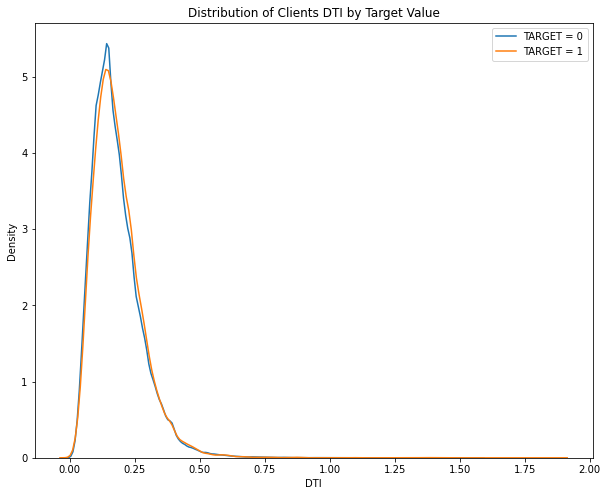

In [107]:
#KDE plot of Client's DTI by Target Value
plt.figure(figsize=(10,8))
sns.kdeplot(train.loc[train['TARGET']==0, 'DTI'], label='TARGET = 0')
sns.kdeplot(train.loc[train['TARGET']==1, 'DTI'], label='TARGET = 1')
plt.xlabel('DTI')
plt.ylabel('Density')
plt.title('Distribution of Clients DTI by Target Value')
plt.legend()